In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris=datasets.load_iris()
x=iris['data'][:,(2,3)]
y=(iris['target']==2).astype(np.float64)

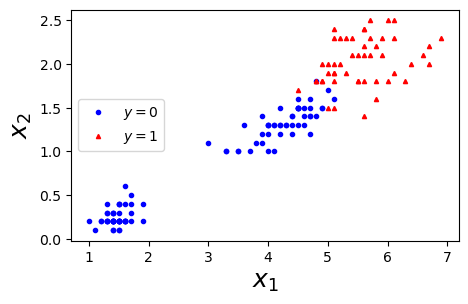

In [3]:
plt.figure(figsize=(5,3))
plt.plot(x[y==0,0],x[y==0,1],'bo',markersize=3,label='$y=0$')
plt.plot(x[y==1,0],x[y==1,1],"r^",markersize=3,label='$y=1$')
plt.legend(loc='center left')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18)
plt.show()

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm_clf=Pipeline([
    ('scal',StandardScaler()),
    ('lin_svc',LinearSVC(C=1,loss='hinge',random_state=1))
])
svm_clf.fit(x,y)
svm_clf['lin_svc'].intercept_, svm_clf['lin_svc'].coef_

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


(array([-2.5053212]), array([[1.63336059, 2.38799535]]))

In [5]:
svm_clf.score(x,y)

0.96

In [6]:
svm_clf.predict([[5.5,1.7]])

array([1.])

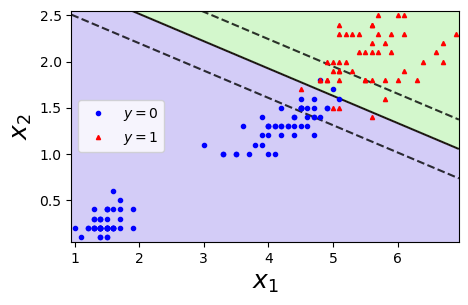

In [7]:
def plot_predictions(model,x,y):
    x1s=np.linspace(x.min(axis=0)[0]-0.05,x.max(axis=0)[0]+0.05,1000)
    x2s=np.linspace(x.min(axis=0)[1]-0.05,x.max(axis=0)[1]+0.05,1000)
    x1,x2=np.meshgrid(x1s,x2s)
    X_new=np.c_[x1.ravel(),x2.ravel()]
    y_pred=model.predict(X_new).reshape(x1.shape)
    plt.contourf(x1,x2,y_pred,cmap=plt.cm.brg,alpha=0.2)
    y_decision=model.decision_function(X_new).reshape(x1.shape)
    plt.contour(x1,x2,y_decision,colors='k',levels=[-1,0,1],linestyles=['--','-','--'],alpha=0.8)
    plt.plot(x[y==0,0],x[y==0,1],'bo',markersize=3,label='$y=0$')
    plt.plot(x[y==1,0],x[y==1,1],"r^",markersize=3,label='$y=1$')
    plt.legend(loc='center left')
    plt.xlabel('$x_1$',fontsize=18)
    plt.ylabel('$x_2$',fontsize=18)
plt.figure(figsize=(5,3))
plot_predictions(svm_clf,x,y)
plt.show()

In [9]:
from sklearn.svm import SVC
svc_clf=Pipeline([
    ('scal',StandardScaler()),
    ('lin_svc',SVC(kernel='linear',C=1,random_state=1))
])
svc_clf.fit(x,y)
svc_clf['lin_svc'].intercept_, svc_clf['lin_svc'].coef_

(array([-2.84959514]), array([[2.09352075, 2.44252199]]))

In [10]:
svc_clf.score(x,y)

0.9533333333333334

In [11]:
svc_clf.predict([[5.5,1.7]])

array([1.])

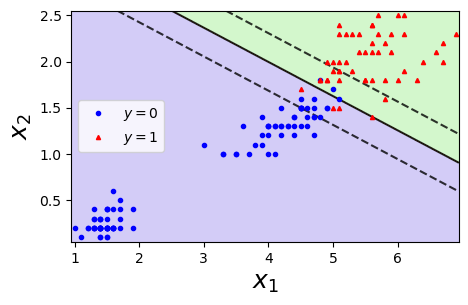

In [12]:
plt.figure(figsize=(5,3))
plot_predictions(svc_clf,x,y)
plt.show()

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf=Pipeline([
    ('scal',StandardScaler()),
    ('lin_svc',SGDClassifier(loss='hinge',alpha=1/(1*len(y)),random_state=1))
     ])
sgd_clf.fit(x,y)
sgd_clf['lin_svc'].intercept_, sgd_clf['lin_svc'].coef_

(array([-3.41874739]), array([[2.32563254, 2.69470285]]))

In [18]:
sgd_clf.score(x,y)

0.9666666666666667

In [19]:
sgd_clf.predict([[5.5,1.7]])

array([1.])

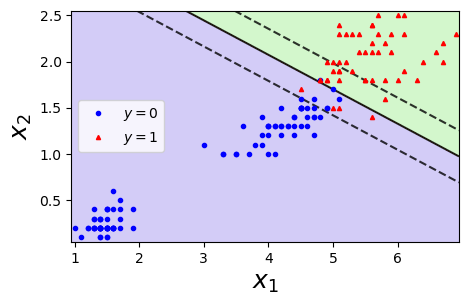

In [20]:
plt.figure(figsize=(5,3))
plot_predictions(sgd_clf,x,y)
plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=100,noise=0.15,random_state=1)

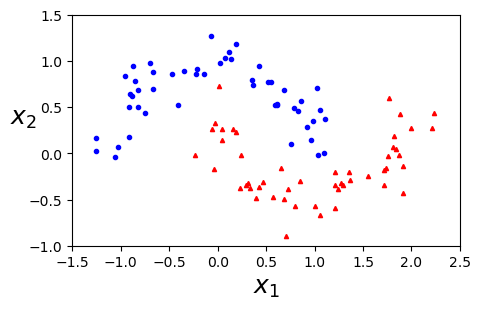

In [23]:
plt.figure(figsize=(5,3))
plt.plot(x[y==0,0],x[y==0,1],'bo',markersize=3)
plt.plot(x[y==1,0],x[y==1,1],'r^',markersize=3)
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18,rotation=0)
plt.axis([-1.5,2.5,-1,1.5])
plt.show()

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC

In [25]:
poly_svm_clf=Pipeline([
    ('poly_features',PolynomialFeatures(degree=3,include_bias=False)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(max_iter=10000,C=10,loss='hinge',random_state=1))
])
poly_svm_clf.fit(x,y)
poly_svm_clf['svm_clf'].intercept_, poly_svm_clf['svm_clf'].coef_

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


(array([-0.03153186]),
 array([[-2.25249606, -2.09821249, -3.60711099,  0.06669574,  0.24982146,
          6.2377727 , -0.96763359,  2.00076335, -0.93935332]]))

In [27]:
poly_svm_clf['poly_features'].get_feature_names_out(['x1','x2'])

array(['x1', 'x2', 'x1^2', 'x1 x2', 'x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2',
       'x2^3'], dtype=object)

In [28]:
poly_svm_clf.score(x,y)

0.99

In [35]:
def plot_predictions(model,axes=[-1.5,2.5,-1,1.5]):
    x1s=np.linspace(axes[0],axes[1],1000)
    x2s=np.linspace(axes[2],axes[3],1000)
    x1,x2=np.meshgrid(x1s,x2s)
    X_new=np.c_[x1.ravel(),x2.ravel()]
    y_pred=model.predict(X_new).reshape(x1.shape)
    plt.contourf(x1,x2,y_pred,cmap=plt.cm.brg,alpha=0.2)
    y_decision=model.decision_function(X_new).reshape(x1.shape)
    plt.contour(x1,x2,y_decision,colors='k',levels=[-1,0,1],linestyles=['--','-','--'],alpha=0.8)
    plt.plot(x[y==0,0],x[y==0,1],'bo',markersize=3,label='$y=0$')
    plt.plot(x[y==1,0],x[y==1,1],'r^',markersize=3,label='$y=1$')
    plt.legend(loc='upper right')
    plt.xlabel('$x_1$',fontsize=18)
    plt.ylabel('$x_2$',fontsize=18)

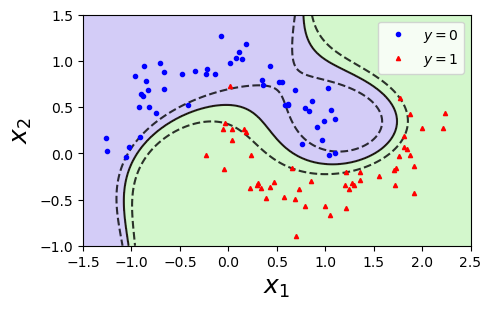

In [36]:
plt.figure(figsize=(5,3))
plot_predictions(poly_svm_clf)
plt.show()

In [37]:
from sklearn.linear_model import SGDClassifier
sgd_clf=Pipeline([
    ('poly_features',PolynomialFeatures(degree=3,include_bias=False)),
    ('scaler',StandardScaler()),
    ('sgd',SGDClassifier(loss='hinge',penalty='l2',alpha=0.001,random_state=1))
])
sgd_clf.fit(x,y)
sgd_clf['sgd'].intercept_, sgd_clf['sgd'].coef_

(array([0.44326694]),
 array([[-2.63679028, -2.95315671, -5.40210818, -1.01936287,  0.21208227,
          9.10964191, -0.31194776,  2.33736493, -1.08086096]]))

In [38]:
sgd_clf.score(x,y)

0.99

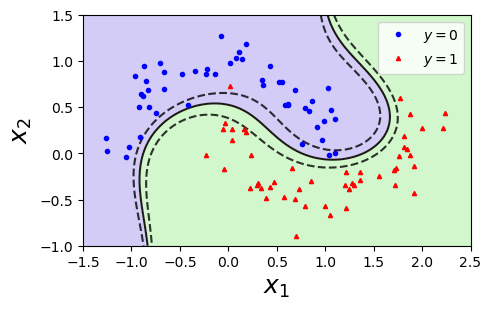

In [39]:
plt.figure(figsize=(5,3))
plot_predictions(sgd_clf)
plt.show()

In [40]:
from sklearn.svm import SVC
poly_clf=Pipeline([
    ('scaler',StandardScaler()),
    ('poly_svc',SVC(kernel='poly',degree=3,coef0=1,C=10,random_state=1))
])
poly_clf.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_svc',
                 SVC(C=10, coef0=1, kernel='poly', random_state=1))])

In [41]:
poly_clf.score(x,y)

0.99

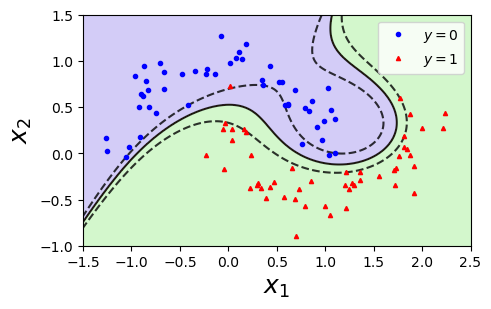

In [42]:
plt.figure(figsize=(5,3))
plot_predictions(poly_clf)
plt.show()

In [43]:
from sklearn.svm import SVC
rbf_clf=Pipeline([
    ('scaler',StandardScaler()),
    ('linear_svc',SVC(kernel='rbf',gamma=5,C=10,random_state=1))
])
rbf_clf.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', SVC(C=10, gamma=5, random_state=1))])

In [44]:
rbf_clf.score(x,y)

1.0

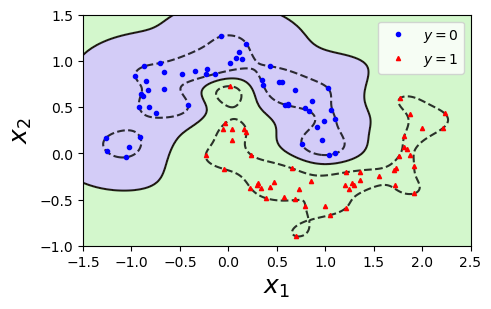

In [45]:
plt.figure(figsize=(5,3))
plot_predictions(rbf_clf)
plt.show()